### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
# Somando apenas o preço das vendas, sem considerar as parcelas
faturamento_loja1 = loja['Preço'].astype(float).sum()
faturamento_loja2 = loja2['Preço'].astype(float).sum()
faturamento_loja3 = loja3['Preço'].astype(float).sum()
faturamento_loja4 = loja4['Preço'].astype(float).sum()

# Mostrar os resultados
print(f"Faturamento Loja 1: R${faturamento_loja1:,.2f}")
print(f"Faturamento Loja 2: R${faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R${faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R${faturamento_loja4:,.2f}")

# Faturamento total de todas as lojas
faturamento_total = faturamento_loja1 + faturamento_loja2 + faturamento_loja3 + faturamento_loja4
print(f"\nFaturamento total de todas as lojas: R${faturamento_total:,.2f}")


Faturamento Loja 1: R$1,534,509.12
Faturamento Loja 2: R$1,488,459.06
Faturamento Loja 3: R$1,464,025.03
Faturamento Loja 4: R$1,384,497.58

Faturamento total de todas as lojas: R$5,871,490.79


# 2. Vendas por Categoria


In [4]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

vendas_por_categoria = {}

for i, url in enumerate(urls):
    dados_loja = ler_csv(url)
    print(f"\nVendas por categoria na Loja {i+1}:")

    categorias_loja = {}

    for venda in dados_loja:
        categoria = venda['Categoria do Produto']
        preco = float(venda['Preço'])
        quantidade = int(venda['Quantidade de parcelas'])
        valor_venda = preco * quantidade

        # Adicionar ao dicionário da loja atual
        if categoria in categorias_loja:
            categorias_loja[categoria] += valor_venda
        else:
            categorias_loja[categoria] = valor_venda

        # Adicionar ao dicionário geral
        if categoria in vendas_por_categoria:
            vendas_por_categoria[categoria] += valor_venda
        else:
            vendas_por_categoria[categoria] = valor_venda

    # Mostrar resultados para esta loja
    for categoria, valor in categorias_loja.items():
        print(f"{categoria}: R${valor:,.2f}")

# Mostrar resultados totais
print("\nVendas totais por categoria (todas as lojas):")
for categoria, valor in vendas_por_categoria.items():
    print(f"{categoria}: R${valor:,.2f}")

# Calcular o total geral
total_geral = sum(vendas_por_categoria.values())
print(f"\nTotal geral de vendas: R${total_geral:,.2f}")







Vendas por categoria na Loja 1:
eletronicos: R$1,720,525.18
moveis: R$777,243.14
brinquedos: R$65,412.04
eletrodomesticos: R$1,376,501.27
utilidades domesticas: R$51,092.72
esporte e lazer: R$169,179.18
livros: R$34,360.24
instrumentos musicais: R$369,322.34

Vendas por categoria na Loja 2:
moveis: R$703,108.03
instrumentos musicais: R$392,599.48
esporte e lazer: R$108,879.57
eletronicos: R$1,715,519.72
utilidades domesticas: R$56,984.93
brinquedos: R$62,300.37
eletrodomesticos: R$1,368,304.66
livros: R$41,887.42

Vendas por categoria na Loja 3:
eletrodomesticos: R$1,441,845.38
moveis: R$740,123.50
instrumentos musicais: R$333,781.40
esporte e lazer: R$164,527.29
eletronicos: R$1,468,443.69
brinquedos: R$81,591.72
utilidades domesticas: R$59,635.75
livros: R$35,142.69

Vendas por categoria na Loja 4:
eletrodomesticos: R$1,172,119.35
moveis: R$742,172.64
esporte e lazer: R$133,411.27
livros: R$39,390.51
eletronicos: R$1,615,256.00
instrumentos musicais: R$297,117.55
brinquedos: R$72,84

# 3. Média de Avaliação das Lojas

In [5]:
def media_avaliacao(loja, numero_loja):
    media = loja['Avaliação da compra'].mean()
    print(f"Média da avaliação da Loja {numero_loja}: {media:.2f}")

# Calculando para as 4 lojas
media_avaliacao(loja, 1)
media_avaliacao(loja2, 2)
media_avaliacao(loja3, 3)
media_avaliacao(loja4, 4)



Média da avaliação da Loja 1: 3.98
Média da avaliação da Loja 2: 4.04
Média da avaliação da Loja 3: 4.05
Média da avaliação da Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [6]:
from collections import defaultdict

def top_produtos_por_faturamento(dados_loja, numero_loja):
    faturamento_por_produto = defaultdict(float)

    for _, venda in dados_loja.iterrows():
        produto = venda['Produto']
        preco = float(venda['Preço'])
        faturamento_por_produto[produto] += preco

    produtos_ordenados = sorted(faturamento_por_produto.items(), key=lambda x: x[1], reverse=True)

    top_mais_vendidos = produtos_ordenados[:3]
    top_menos_vendidos = produtos_ordenados[-3:]

    print(f"\nLoja {numero_loja} - TOP 3 produtos que MAIS dinheiro geraram:")
    for produto, faturamento in top_mais_vendidos:
        print(f"{produto} - R${faturamento:.2f}")

    print(f"\nLoja {numero_loja} - TOP 3 produtos que MENOS dinheiro geraram:")
    for produto, faturamento in top_menos_vendidos:
        print(f"{produto} - R${faturamento:.2f}")

# Executando para as 4 lojas
top_produtos_por_faturamento(loja, 1)
top_produtos_por_faturamento(loja2, 2)
top_produtos_por_faturamento(loja3, 3)
top_produtos_por_faturamento(loja4, 4)



Loja 1 - TOP 3 produtos que MAIS dinheiro geraram:
TV Led UHD 4K - R$189534.28
Geladeira - R$149524.28
Celular Plus X42 - R$130536.40

Loja 1 - TOP 3 produtos que MENOS dinheiro geraram:
Cubo mágico 8x8 - R$929.27
Dinossauro Rex - R$918.40
Corda de pular - R$870.89

Loja 2 - TOP 3 produtos que MAIS dinheiro geraram:
Celular Plus X42 - R$150967.83
TV Led UHD 4K - R$137833.06
Geladeira - R$130176.48

Loja 2 - TOP 3 produtos que MENOS dinheiro geraram:
Corda de pular - R$1142.54
Dinossauro Rex - R$1027.41
Cubo mágico 8x8 - R$858.22

Loja 3 - TOP 3 produtos que MAIS dinheiro geraram:
Geladeira - R$133185.99
TV Led UHD 4K - R$128892.11
Celular Plus X42 - R$124300.84

Loja 3 - TOP 3 produtos que MENOS dinheiro geraram:
Corda de pular - R$1137.76
Dinossauro Rex - R$1060.78
Cubo mágico 8x8 - R$853.81

Loja 4 - TOP 3 produtos que MAIS dinheiro geraram:
Celular Plus X42 - R$128930.07
TV Led UHD 4K - R$120393.25
Smart TV - R$110387.57

Loja 4 - TOP 3 produtos que MENOS dinheiro geraram:
Dinossau

# 5. Frete Médio por Loja


In [7]:
# Calculando o frete médio por loja
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()


print(f"Frete médio - Loja 1: R${frete_medio_loja1:.2f}")
print(f"Frete médio - Loja 2: R${frete_medio_loja2:.2f}")
print(f"Frete médio - Loja 3: R${frete_medio_loja3:.2f}")
print(f"Frete médio - Loja 4: R${frete_medio_loja4:.2f}")


Frete médio - Loja 1: R$34.69
Frete médio - Loja 2: R$33.62
Frete médio - Loja 3: R$33.07
Frete médio - Loja 4: R$31.28


# 6. Métrica extra

In [10]:
def ticket_medio(loja, numero_loja):
    faturamento = loja['Preço'].sum()
    vendas = loja.shape[0]
    ticket = faturamento / vendas
    print(f"Ticket médio da Loja {numero_loja}: R$ {ticket:.2f}")


ticket_medio(loja, 1)
ticket_medio(loja2, 2)
ticket_medio(loja3, 3)
ticket_medio(loja4, 4)


Ticket médio da Loja 1: R$ 650.49
Ticket médio da Loja 2: R$ 630.97
Ticket médio da Loja 3: R$ 620.61
Ticket médio da Loja 4: R$ 587.15


# 7. Gráficos

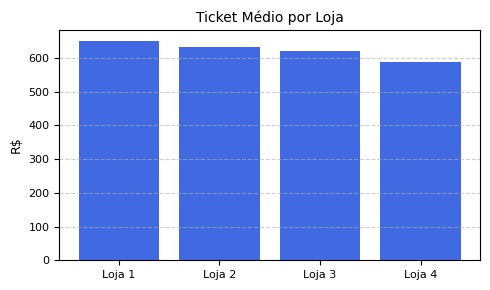

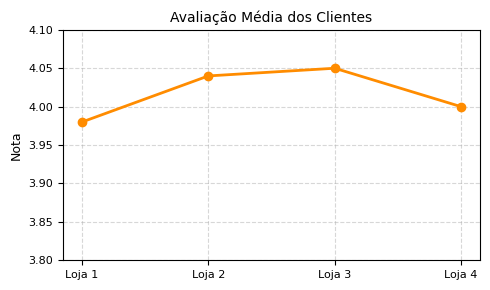

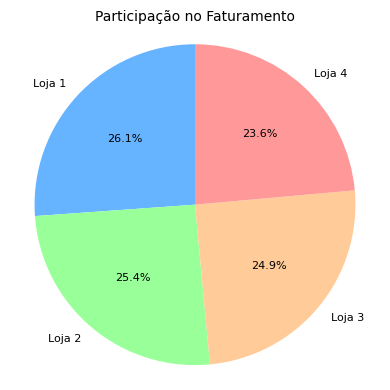

In [14]:
import matplotlib.pyplot as plt

# Dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
ticket_medio = [650.49, 630.97, 620.61, 587.15]
avaliacoes = [3.98, 4.04, 4.05, 4.00]
faturamento = [1534509.12, 1488459.06, 1464025.03, 1384497.58]

# Gráfico de Barras – Ticket Médio
plt.figure(figsize=(5, 3))
plt.bar(lojas, ticket_medio, color='royalblue')
plt.title('Ticket Médio por Loja', fontsize=10)
plt.ylabel('R$', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Gráfico de Linha – Avaliação Média
plt.figure(figsize=(5, 3))
plt.plot(lojas, avaliacoes, marker='o', color='darkorange', linewidth=2)
plt.title('Avaliação Média dos Clientes', fontsize=10)
plt.ylabel('Nota', fontsize=9)
plt.ylim(3.8, 4.1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Gráfico de Pizza – Faturamento
plt.figure(figsize=(4, 4))
plt.pie(faturamento, labels=lojas, autopct='%1.1f%%', startangle=90,
        colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'], textprops={'fontsize': 8})
plt.title('Participação no Faturamento', fontsize=10)
plt.axis('equal')
plt.tight_layout()
plt.show()


# 8. Relatório de Análise Estratégica para Identificação da Melhor Loja a Ser Vendida




##  1. Introdução

Este relatório tem como objetivo principal **identificar a loja com menor desempenho estratégico**, entre quatro lojas analisadas, para ser **vendida com o intuito de viabilizar um novo investimento ou negócio**. Foram consideradas métricas como faturamento, ticket médio, avaliação dos clientes, volume de vendas por categoria, produtos mais e menos vendidos e frete médio por loja.

##  2. Metodologia Aplicada

Para embasar a decisão de forma objetiva, foi adotada uma abordagem quantitativa com as seguintes etapas:

- Coleta e processamento de dados em ambiente Python (Google Colab).
- Agrupamento das métricas por loja.
- Cálculo de indicadores-chave, como:
  - Faturamento total
  - Ticket médio
  - Avaliação média dos clientes
  - Frete médio
  - Desempenho de vendas por produto e categoria
- Visualização por meio de **gráficos comparativos** para facilitar a interpretação e comparação entre as lojas.

## 3. Apresentação dos Dados

A análise gráfica revelou as seguintes informações principais:

- **Loja 1**: Apresenta o maior ticket médio (R$ 650,49) e também o maior faturamento total. No entanto, é importante destacar que essa loja possui a **menor média de avaliação dos clientes** (3,98), o que pode indicar problemas na experiência do consumidor.

- **Loja 2**: Apresenta um bom equilíbrio entre ticket médio (R$ 630,97) e média de avaliação (4,01), se posicionando de forma consistente.

- **Loja 3**: Destaca-se com a **melhor média de avaliação entre todas** (4,05), o que é um forte indicativo de boa experiência de compra. Seu ticket médio é de R$ 620,61.

- **Loja 4**: Possui o **menor ticket médio** (R$ 587,15) e o **menor faturamento**, mas se sobressai com o **frete médio mais baixo** (RS 31,28), o que indica um bom desempenho logístico.

##  4. Resultados da Análise de Dados

Os gráficos comparativos mostraram que:

- O faturamento e ticket médio da Loja 4 são significativamente mais baixos do que os das demais lojas.
- Embora a Loja 4 tenha o menor custo logístico, isso não é suficiente para compensar seu baixo desempenho comercial.
- A Loja 3 destaca-se pela excelente avaliação dos clientes, o que é um indicativo de boa experiência de compra e potencial de fidelização.

##  5. Interpretações e Recomendações

Com base nos resultados obtidos:

- **Recomenda-se a venda da Loja 4**, pois ela é a menos rentável e menos promissora em termos de desempenho geral.
- A **atenção deve ser redobrada com a Loja 1**, mesmo apresentando o maior faturamento e ticket médio, pois possui a **pior avaliação entre os clientes**. Isso pode indicar problemas de qualidade, atendimento ou experiência de compra, que precisam ser investigados para evitar impactos futuros.
- As Lojas 2 e 3 demonstram bons níveis de equilíbrio entre desempenho financeiro e satisfação do cliente, sendo as mais adequadas para manutenção e possíveis investimentos futuros.

##  6. Conclusão

A análise dos indicadores através de gráficos aponta que a **Loja 4 é a melhor candidata à venda**, permitindo que os recursos sejam redirecionados para áreas mais estratégicas ou a abertura de um novo negócio. Além disso, é recomendado **acompanhar de perto a Loja 1**, que embora apresente bons resultados financeiros, mostra sinais de insatisfação do público, o que pode comprometer sua sustentabilidade no médio e longo prazo.
